In [1]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A
from albumentations.pytorch import ToTensorV2
from data.transforms import RandomErasing

In [2]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

In [3]:
from data.image import build_datasource
datasource = build_datasource('peta', '/datasets', False, False, True)

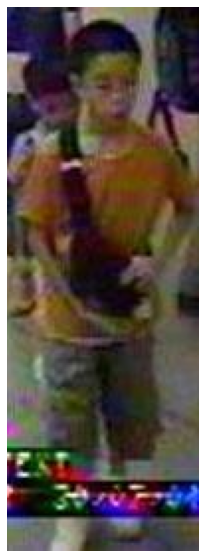

In [4]:
phase = 'test'
image_path, labels = datasource.get_data(phase)[random.randint(0, len(datasource.get_data(phase)))]

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_height, image_width, image_depth = image.shape

visualize(image)

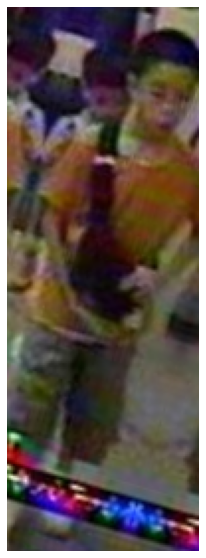

In [5]:
transform = A.Compose([
    A.Rotate(limit=45, always_apply=True)
    ])

transformed = transform(image=image)

visualize(transformed['image'])

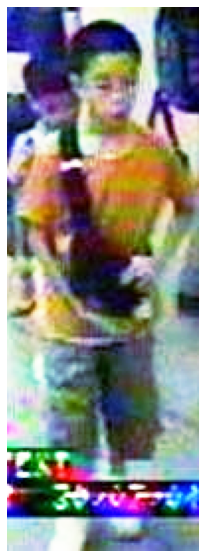

In [6]:
transform = A.Compose([
    A.Equalize(mode='cv', p=0.8, always_apply=True)
    ])

transformed = transform(image=image)

visualize(transformed['image'])

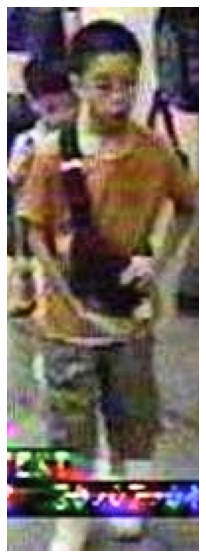

In [7]:
transform = A.Compose([
    A.CLAHE(p=0.8, always_apply=True)
    ])

transformed = transform(image=image)

visualize(transformed['image'])

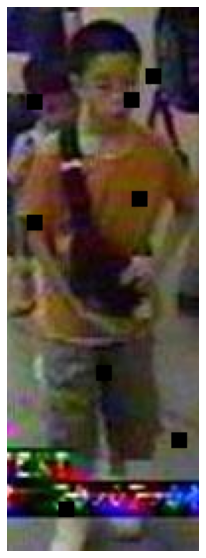

In [8]:
transform = A.Compose([
    A.Cutout(num_holes=8, always_apply=True)
    ])

transformed = transform(image=image)

visualize(transformed['image'])

In [9]:
transform = A.Compose([
    A.Lambda(image=RandomErasing(probability=0.5, mean=[0.0, 0.0, 0.0]))
    ])

transformed = transform(image=image)

visualize(transformed['image'])

TypeError: 'int' object is not callable

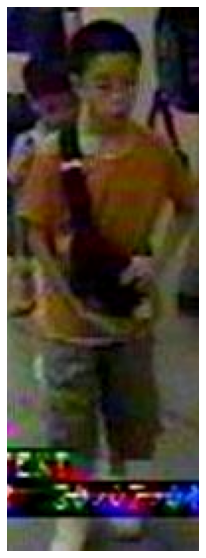

In [10]:
transform = A.Compose([
    A.RGBShift(always_apply=True)
    ])

transformed = transform(image=image)

visualize(transformed['image'])

In [11]:
image_size = [256, 192]

In [12]:
transform = A.Compose([
                A.Resize(image_size[0], image_size[1]),
                A.PadIfNeeded(min_height=image_size[0]+10, min_width=image_size[1]+10),
                A.RandomCrop(image_size[0], image_size[1]),
                A.HorizontalFlip(p=0.5),
                # A.Normalize(
                #     mean=[0.485, 0.456, 0.406],
                #     std=[0.229, 0.224, 0.225],
                # ),
                # ToTensorV2(),
                # A.Lambda(image=RandomErasing(probability=0.5, mean=[0.0, 0.0, 0.0]))
        ])

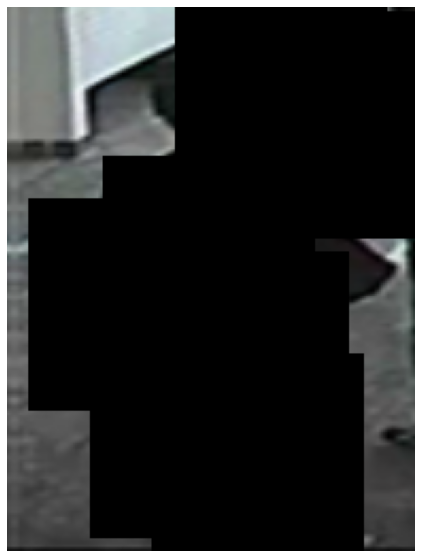

In [28]:
transformed = transform(image=image)

visualize(transformed['image'])